In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df

HTTPError: HTTP Error 404: Not Found

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

In [ ]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
    
print("numerical column=",numerical_columns)
    

In [ ]:
#all columns are numerical

In [ ]:
df.nunique().to_frame("no. of unique values")

In [ ]:
df['W'].unique()

In [ ]:
sns.countplot(df['W'])
plt.show()

In [ ]:
df['R'].unique()

In [ ]:
df['AB'].unique()

In [ ]:
df['H'].unique()

In [ ]:
df['2B'].unique()

In [ ]:
df['3B'].unique()

In [ ]:
df['HR'].unique()

In [ ]:
df['BB'].unique()

In [ ]:
df['SO'].unique()

In [ ]:
df['SB'].unique()

In [ ]:
df['RA'].unique()

In [ ]:
df['ER'].unique()

In [ ]:
df['ERA'].unique()

In [ ]:
df['CG'].unique()

In [ ]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for column in df:
    if graph<=18:
        plt.subplot(3,4,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()    

In [ ]:
#data seems uniformly distributed
# "R" and 'H' column data seems little skewed

In [ ]:
plt.bar(df['W'],df['R'])
plt.xlabel('W')
plt.ylabel('R')
plt.show()

In [ ]:
#highest no of wins are at 94 and scored more than 800 runs

In [ ]:
df.columns

In [ ]:
plt.bar(df['W'],df['AB'])
plt.xlabel('W')
plt.ylabel('AB')
plt.show()

In [ ]:
#all wins are above 5000 'AB'

In [ ]:
plt.bar(df['W'],df['H'])
plt.xlabel('W')
plt.ylabel('H')
plt.show()

In [3]:
plt.bar(df['W'],df['2B'])
plt.xlabel('W')
plt.ylabel('2B')
plt.show()

NameError: name 'df' is not defined

In [4]:
plt.bar(df['W'],df['3B'])
plt.xlabel('W')
plt.ylabel('3B')
plt.show()

NameError: name 'df' is not defined

In [5]:
plt.bar(df['W'],df['HR'])
plt.xlabel('W')
plt.ylabel('HR')
plt.show()

NameError: name 'df' is not defined

In [6]:
plt.bar(df['W'],df['BB'])
plt.xlabel('W')
plt.ylabel('BB')
plt.show()

NameError: name 'df' is not defined

In [7]:
plt.bar(df['W'],df['SO'])
plt.xlabel('W')
plt.ylabel('SO')
plt.show()

NameError: name 'df' is not defined

In [8]:
plt.bar(df['W'],df['SB'])
plt.xlabel('W')
plt.ylabel('SB')
plt.show()

NameError: name 'df' is not defined

In [9]:
plt.bar(df['W'],df['RA'])
plt.xlabel('W')
plt.ylabel('RA')
plt.show()

NameError: name 'df' is not defined

In [10]:
plt.bar(df['W'],df['ER'])
plt.xlabel('W')
plt.ylabel('ER')
plt.show()

NameError: name 'df' is not defined

In [11]:
plt.bar(df['W'],df['ERA'])
plt.xlabel('W')
plt.ylabel('ERA')
plt.show()

NameError: name 'df' is not defined

In [12]:
plt.bar(df['W'],df['CG'])
plt.xlabel('W')
plt.ylabel('CG')
plt.show()

NameError: name 'df' is not defined

In [13]:
plt.bar(df['W'],df['SHO'])
plt.xlabel('W')
plt.ylabel('SHO')
plt.show()

NameError: name 'df' is not defined

In [14]:
plt.bar(df['W'],df['SV'])
plt.xlabel('W')
plt.ylabel('SV')
plt.show()

NameError: name 'df' is not defined

In [15]:
plt.bar(df['W'],df['E'])
plt.xlabel('W')
plt.ylabel('E')
plt.show()

NameError: name 'df' is not defined

In [16]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<18:
        plt.subplot(5,4,p)
        sns.scatterplot(x="W",y=i,data=df,color='r')
        plt.xlabel('W')
        plt.ylabel(i)
    p+=1
    
plt.show()

NameError: name 'df' is not defined

<Figure size 2000x2500 with 0 Axes>

In [17]:
#'R'&'W' SHOWS +VE LINEAR RELATION
#'HR'&'W'SHOWS +VE LINEAR RELATONSHIP
#'BB'&'W'
#'RA'&'W' SHOWS -VE LINEAR RELATIONSHIP
#'ER'&'W'SHOWS -VE LINEAR RELATIONSHIP
#'ERA' &'W'-VE
#'SHO &'W +VE
#"SV" &'W' +VE
#

In [18]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
       
    p+=1
    
plt.show()

NameError: name 'df' is not defined

<Figure size 2000x2500 with 0 Axes>

In [19]:
#'E','ERA',SHO,'SV','R' COLUMNS HAS OUTLIERS

In [20]:
# SOME OF the above column have some outliers
from scipy.stats import zscore
out_features=df[['E','ERA','SHO','SV','R']]
z=np.abs(zscore(out_features))
z

NameError: name 'df' is not defined

In [21]:
#threshold=3
np.where(z>3)

NameError: name 'z' is not defined

In [22]:
df1=df[(z<3).all(axis=1)]


df1.shape

NameError: name 'df' is not defined

In [23]:
print('old data shape',df.shape[0])
print("new data shape",df1.shape[0])

NameError: name 'df' is not defined

In [24]:
df.skew()

NameError: name 'df' is not defined

In [25]:
#no sweness in the data

In [26]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

NameError: name 'df' is not defined

<Figure size 2200x1000 with 0 Axes>

In [27]:
#SEPARATING X AND Y
x=df1.drop(columns='W',axis=1)
y=df1['W']

NameError: name 'df1' is not defined

In [28]:
x.shape

NameError: name 'x' is not defined

In [29]:
y.shape

NameError: name 'y' is not defined

In [30]:
#finding the best random state
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("max r2_score is",maxAccu,"on random state",maxRS)

NameError: name 'x' is not defined

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

NameError: name 'x' is not defined

In [32]:
x_train.shape

NameError: name 'x_train' is not defined

In [33]:
x_test.shape

NameError: name 'x_test' is not defined

In [34]:
y_train.shape

NameError: name 'y_train' is not defined

In [35]:
y_test.shape

NameError: name 'y_test' is not defined

In [36]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

NameError: name 'x' is not defined

In [37]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('mean squared error:',mean_squared_error(y_test,pred_LR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

NameError: name 'x_train' is not defined

In [38]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('mean squared error:',mean_squared_error(y_test,pred_RFR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

NameError: name 'x_train' is not defined

In [39]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('mean squared error:',mean_squared_error(y_test,pred_knn))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

NameError: name 'x_train' is not defined

In [40]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('mean squared error:',mean_squared_error(y_test,pred_GBR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

NameError: name 'x_train' is not defined

In [41]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('mean squared error:',mean_squared_error(y_test,pred_lasso))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

NameError: name 'x_train' is not defined

In [42]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

NameError: name 'x_train' is not defined

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

NameError: name 'x_train' is not defined

In [44]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_score:",r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('mean squared error:',mean_squared_error(y_test,pred_svr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

NameError: name 'x_train' is not defined

LINEAR REGRESSOR IS OUR BEST MODEL

In [45]:
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred))

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

NameError: name 'x_train' is not defined

In [46]:
import pickle
filename='baseballwinrate.pk1'
pickle.dump(LR,open(filename,'wb'))    #saved model

In [47]:
import pickle
loaded_model=pickle.load(open('baseballwinrate.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

NameError: name 'x_test' is not defined

In [48]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

NameError: name 'x_test' is not defined

In [49]:
input_data=[724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88]
prediction=LR.predict([input_data])

print(prediction)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# QUESTION 2

In [50]:
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [51]:
data.shape

(18249, 14)

In [52]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [53]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [54]:
data.drop(columns=['Unnamed: 0'],axis=True,inplace=True)

In [55]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [56]:
print(data['Date'].min())

2015-01-04


In [57]:
print(data['Date'].max())

2018-03-25


In [58]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [60]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [61]:
data['type']=[1 if x=='conventional' else 0 for x in data['type']]
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,0,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,0,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,0,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,0,2018,WestTexNewMexico


In [62]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%M-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 1.8+ MB


In [63]:
#setting date as index
data.set_index('Date',inplace=True)

In [64]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.500082,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,1.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000


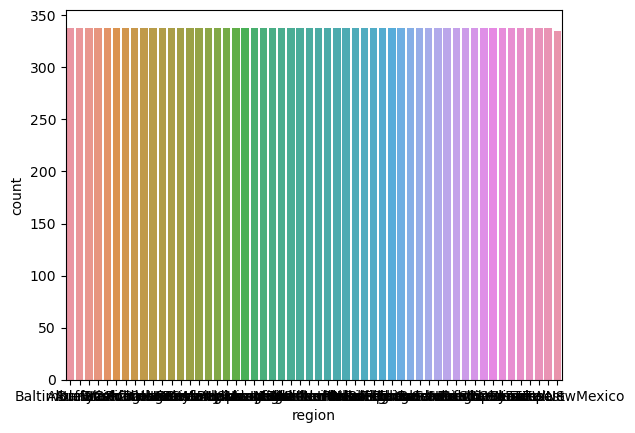

In [65]:
sns.countplot(data['region'])
plt.show()

In [66]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [67]:
#converting categorical data to int

data["region"] =data["region"].astype('category')
data.dtypes


AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type               int64
year               int64
region          category
dtype: object

In [68]:
data["region"] = data["region"].cat.codes
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-27 00:12:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0
2015-01-20 00:12:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0
2015-01-13 00:12:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0
2015-01-06 00:12:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0
2015-01-29 00:11:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0


In [69]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region             int8
dtype: object

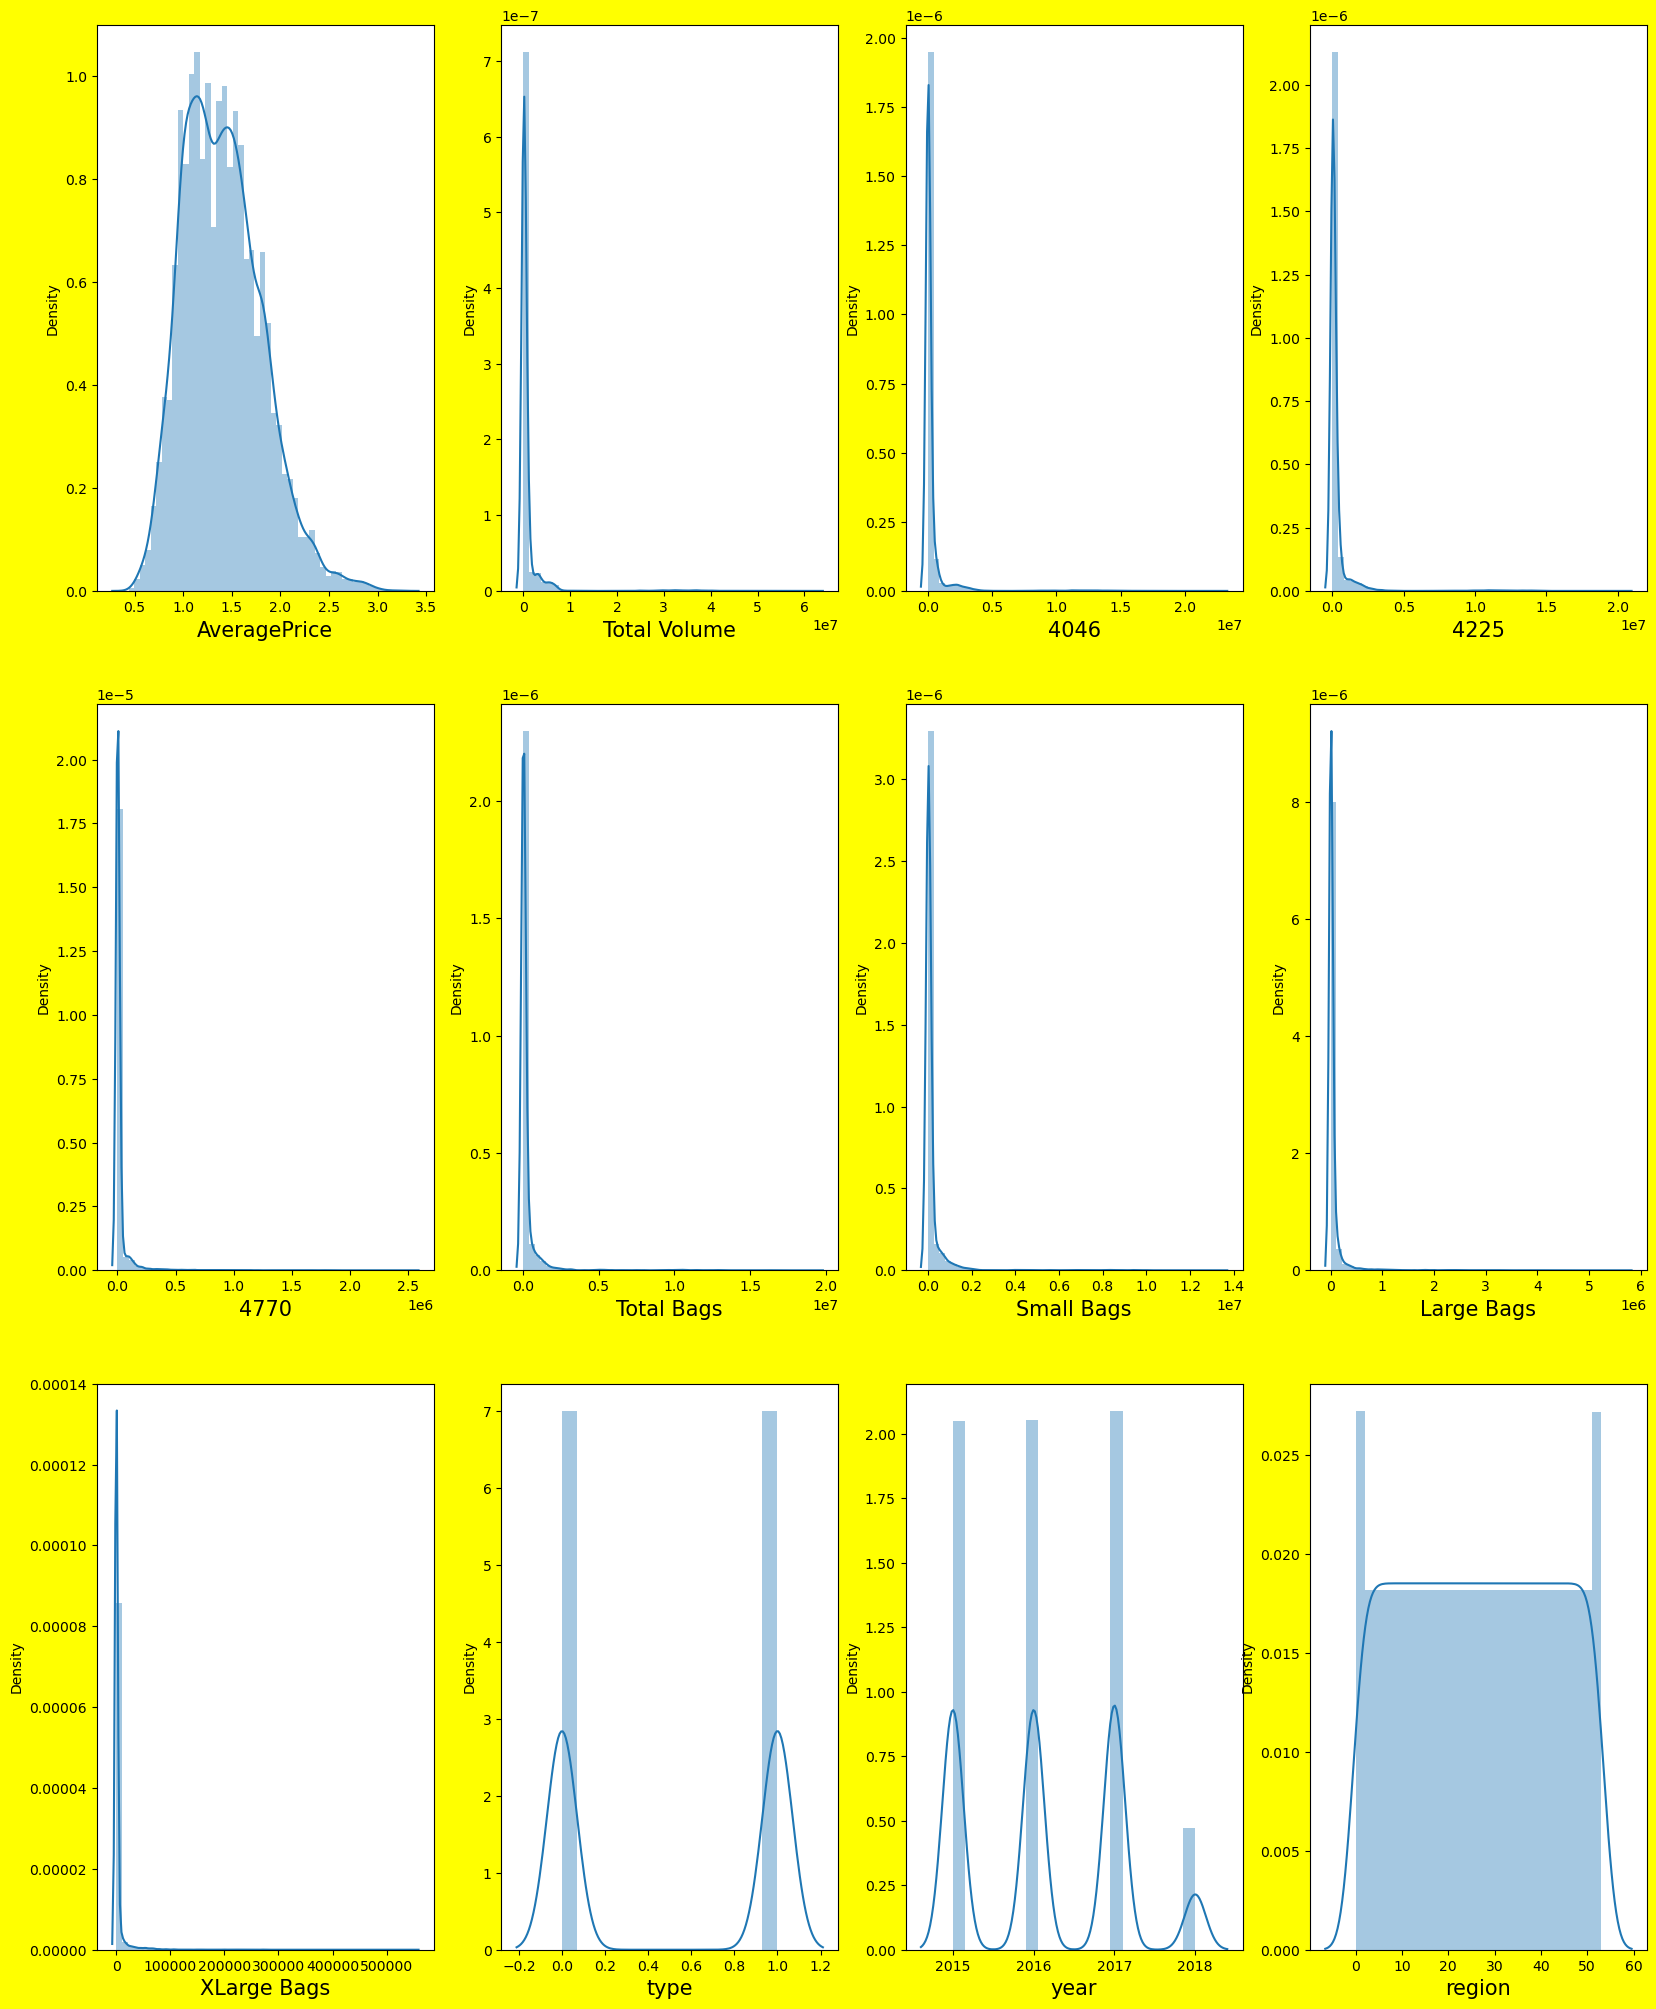

In [70]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for column in data:
    if graph<=15:
        plt.subplot(3,4,graph)
        ax=sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()    

In [71]:
#almost all column has outliers

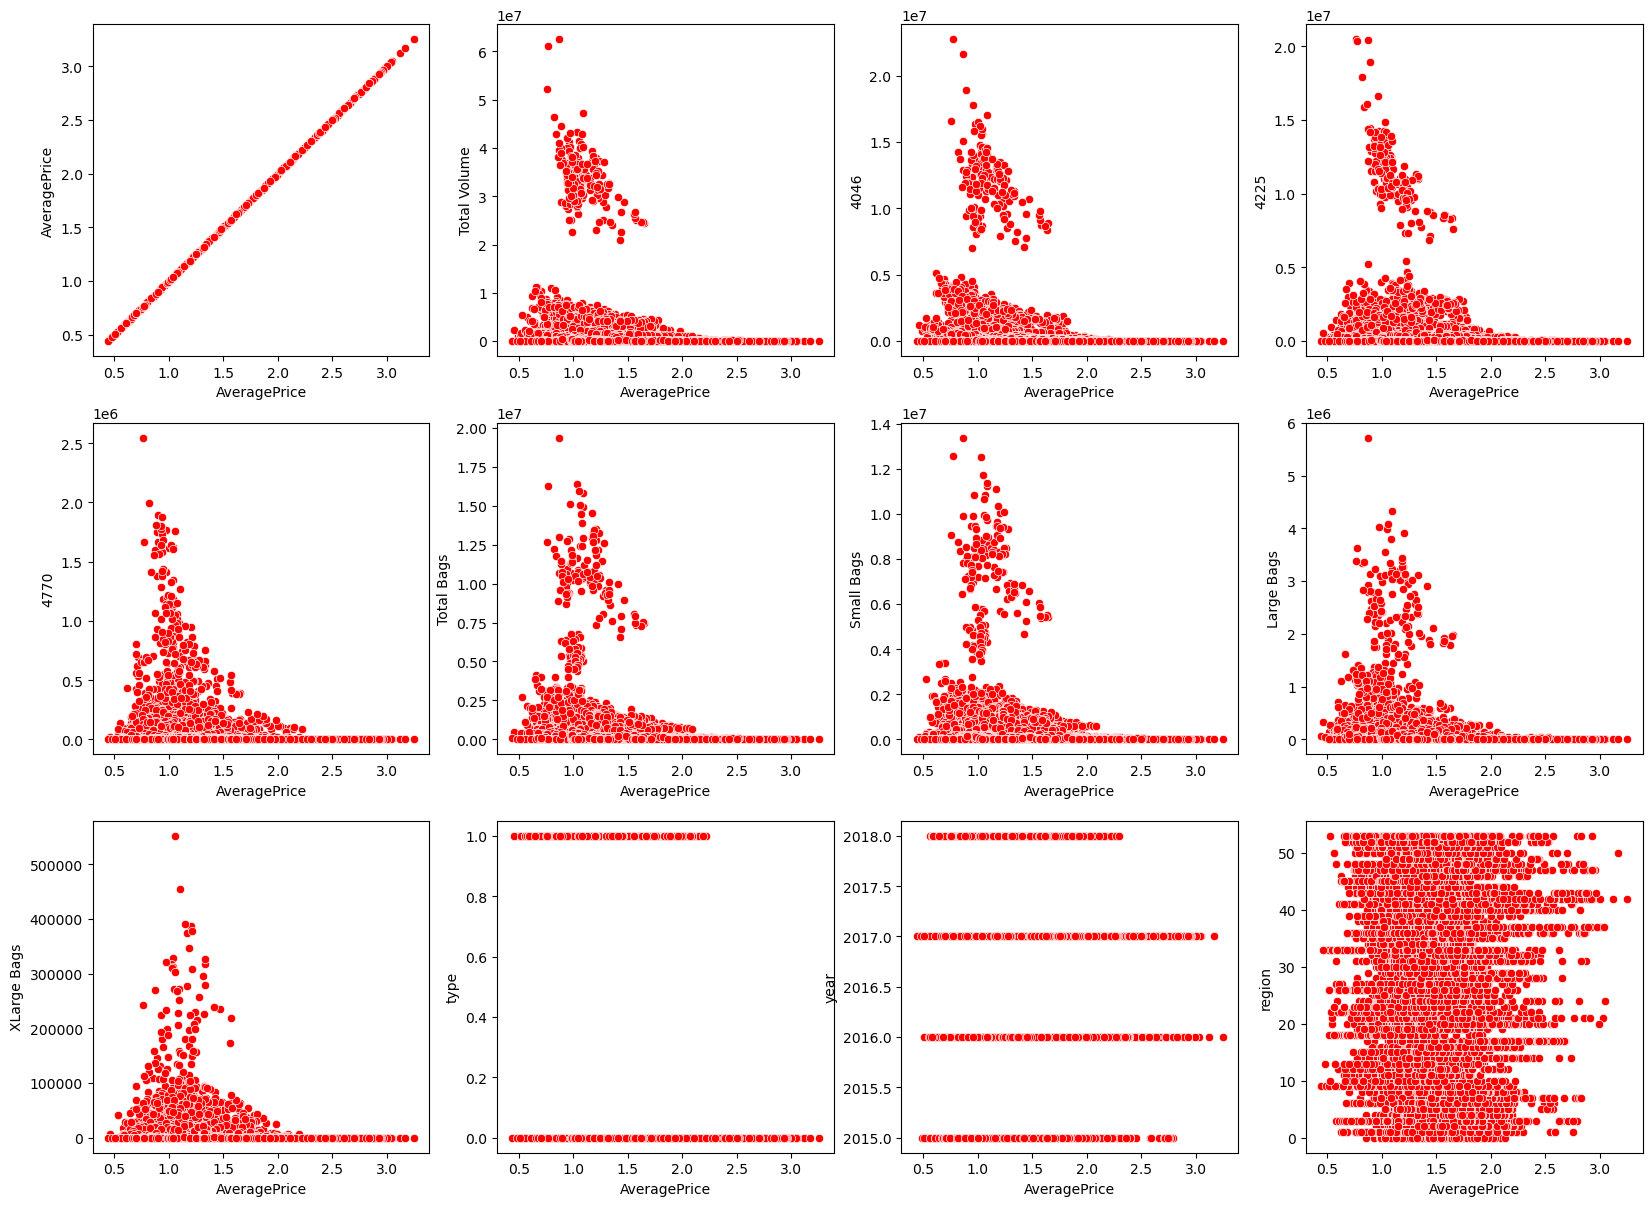

In [72]:
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<14:
        plt.subplot(5,4,p)
        sns.scatterplot(x="AveragePrice",y=i,data=data,color='r')
        plt.xlabel('AveragePrice')
        plt.ylabel(i)
    p+=1
    
plt.show()

AveragePrice       AxesSubplot(0.125,0.712609;0.110714x0.167391)
Total Volume    AxesSubplot(0.257857,0.712609;0.110714x0.167391)
4046            AxesSubplot(0.390714,0.712609;0.110714x0.167391)
4225            AxesSubplot(0.523571,0.712609;0.110714x0.167391)
4770            AxesSubplot(0.656429,0.712609;0.110714x0.167391)
Total Bags      AxesSubplot(0.789286,0.712609;0.110714x0.167391)
Small Bags         AxesSubplot(0.125,0.511739;0.110714x0.167391)
Large Bags      AxesSubplot(0.257857,0.511739;0.110714x0.167391)
XLarge Bags     AxesSubplot(0.390714,0.511739;0.110714x0.167391)
type            AxesSubplot(0.523571,0.511739;0.110714x0.167391)
year            AxesSubplot(0.656429,0.511739;0.110714x0.167391)
region          AxesSubplot(0.789286,0.511739;0.110714x0.167391)
dtype: object

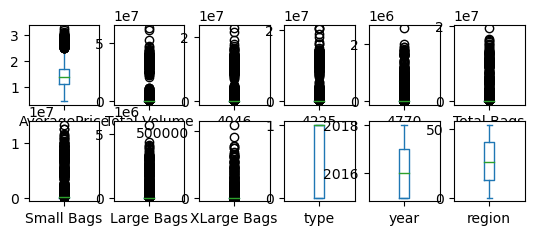

In [73]:
data.plot(kind='box',subplots=True,layout=(4,6))

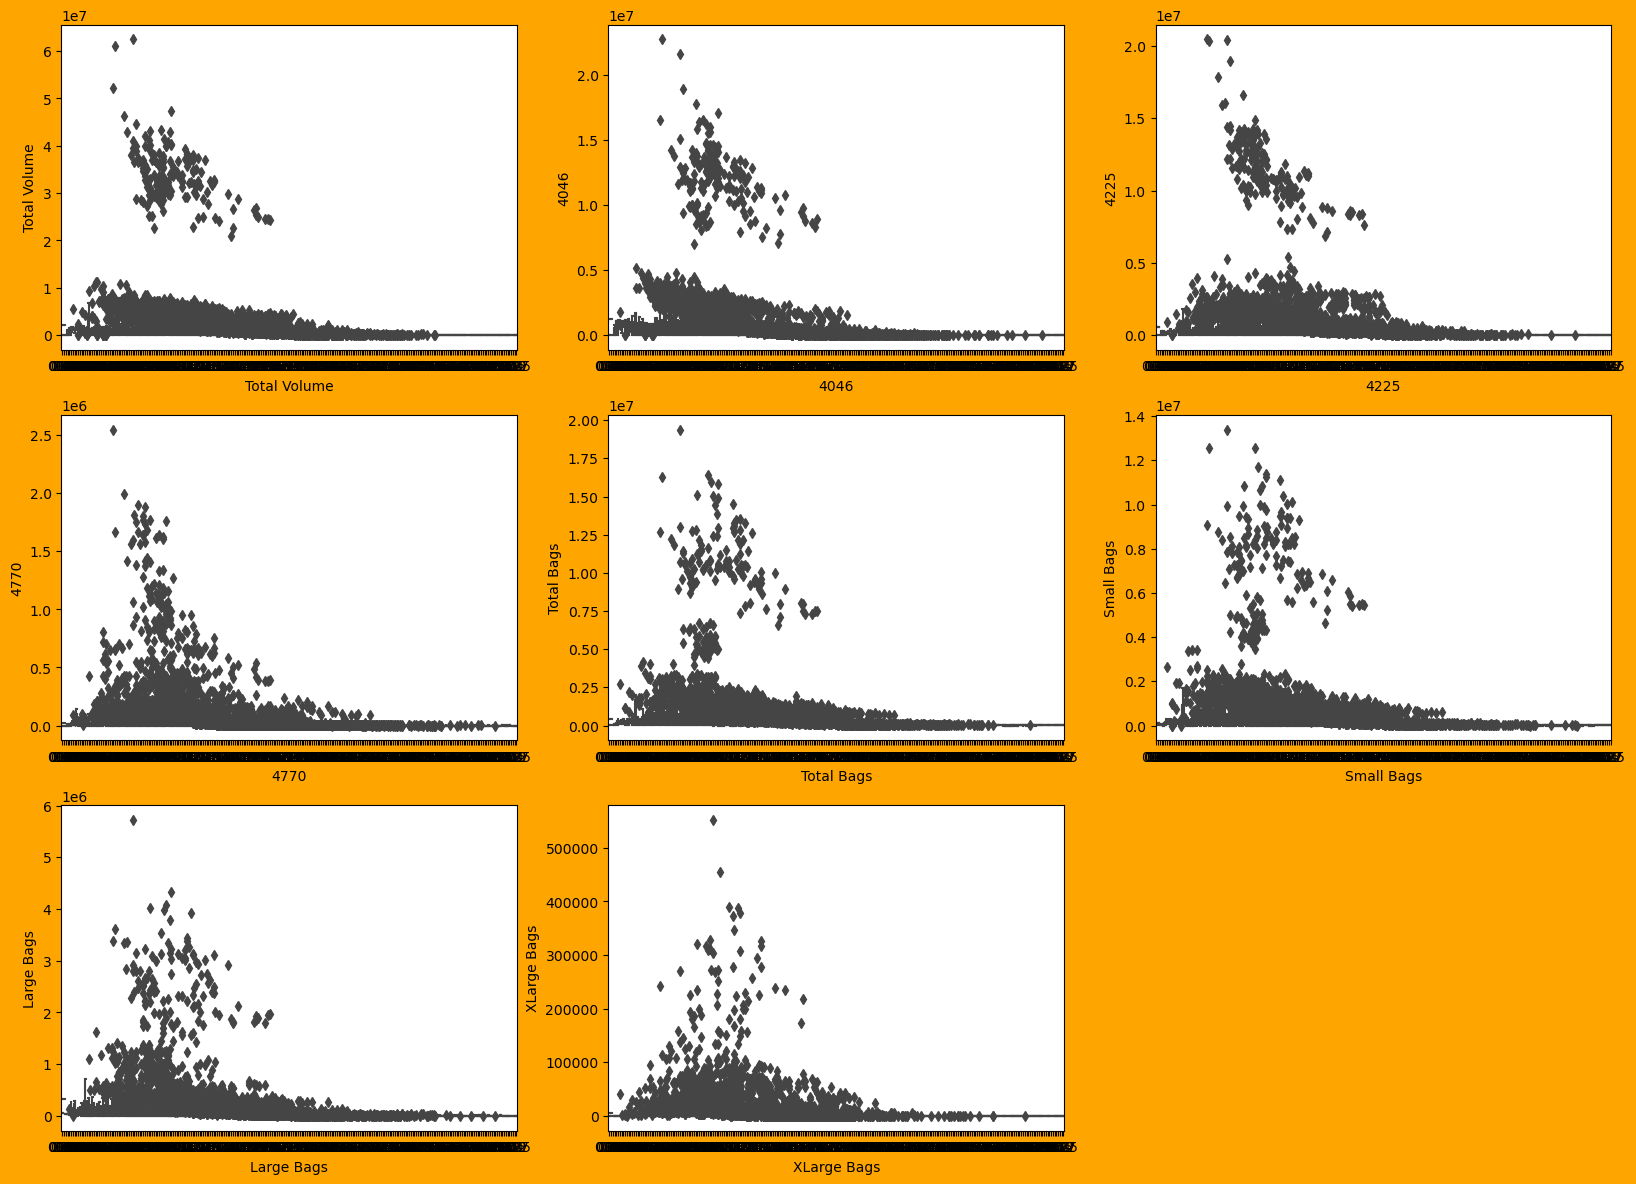

In [74]:
#boxplot to show target distribution with respect numerical features
feature=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(20,60), facecolor='Orange')
plotnumber =1
for feature in feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="AveragePrice", y= data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


In [75]:
#so much outliers are there in every column except type,year,region

In [76]:
# all the above column have some outliers
from scipy.stats import zscore
out_features=data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
z=np.abs(zscore(out_features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,
2015-01-27 00:12:00,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,1.221282
2015-01-20 00:12:00,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,1.221282
2015-01-13 00:12:00,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,1.221282
2015-01-06 00:12:00,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,1.221282
2015-01-29 00:11:00,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,1.221282
...,...,...,...,...,...,...,...,...,...
2018-01-04 00:02:00,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.970504
2018-01-28 00:01:00,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.970504
2018-01-21 00:01:00,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.970504


In [77]:
#threshold=3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113]),
 array([1, 1, 7, ..., 6, 6, 6]))

In [78]:
data1=data[(z<3).all(axis=1)]


data1.shape

(17782, 12)

In [79]:
print('old data shape',data.shape[0])
print("new data shape",data1.shape[0])

old data shape 18249
new data shape 17782


In [80]:
data1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type            0.052210
year            0.220792
region          0.005773
dtype: float64

In [81]:
#removing skeweness using cuberoot method
data1['XLarge Bags']=np.cbrt(data1['XLarge Bags'])

In [82]:
data1['Large Bags']=np.cbrt(data1['Large Bags'])

In [83]:
data1['4770']=np.cbrt(data1['4770'])

In [84]:
data1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            1.645148
Total Bags      4.082103
Small Bags      4.238647
Large Bags      1.282704
XLarge Bags     2.288933
type            0.052210
year            0.220792
region          0.005773
dtype: float64

In [85]:
data1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.328226,-0.327348,-0.243080,-0.447829,-0.295100,-0.274138,-0.449088,-0.298257,-0.608447,0.099910,0.010428
Total Volume,-0.328226,1.000000,0.876417,0.871754,0.679562,0.912311,0.905779,0.620783,0.565355,0.416905,-0.006465,0.074648
4046,-0.327348,0.876417,1.000000,0.565557,0.540940,0.728264,0.707104,0.523473,0.455758,0.342523,-0.035792,0.117225
4225,-0.243080,0.871754,0.565557,1.000000,0.629001,0.758097,0.779038,0.489760,0.462825,0.384443,-0.041588,0.009466
4770,-0.447829,0.679562,0.540940,0.629001,1.000000,0.608196,0.609275,0.498588,0.619973,0.643885,-0.091399,-0.033490
Total Bags,-0.295100,0.912311,0.728264,0.758097,0.608196,1.000000,0.978241,0.678346,0.600172,0.379801,0.101506,0.083800
Small Bags,-0.274138,0.905779,0.707104,0.779038,0.609275,0.978241,1.000000,0.569888,0.607275,0.369139,0.084803,0.064024
Large Bags,-0.449088,0.620783,0.523473,0.489760,0.498588,0.678346,0.569888,1.000000,0.435775,0.477233,0.175099,0.114866
XLarge Bags,-0.298257,0.565355,0.455758,0.462825,0.619973,0.600172,0.607275,0.435775,1.000000,0.521621,0.153004,-0.046151
type,-0.608447,0.416905,0.342523,0.384443,0.643885,0.379801,0.369139,0.477233,0.521621,1.000000,-0.007399,-0.021970


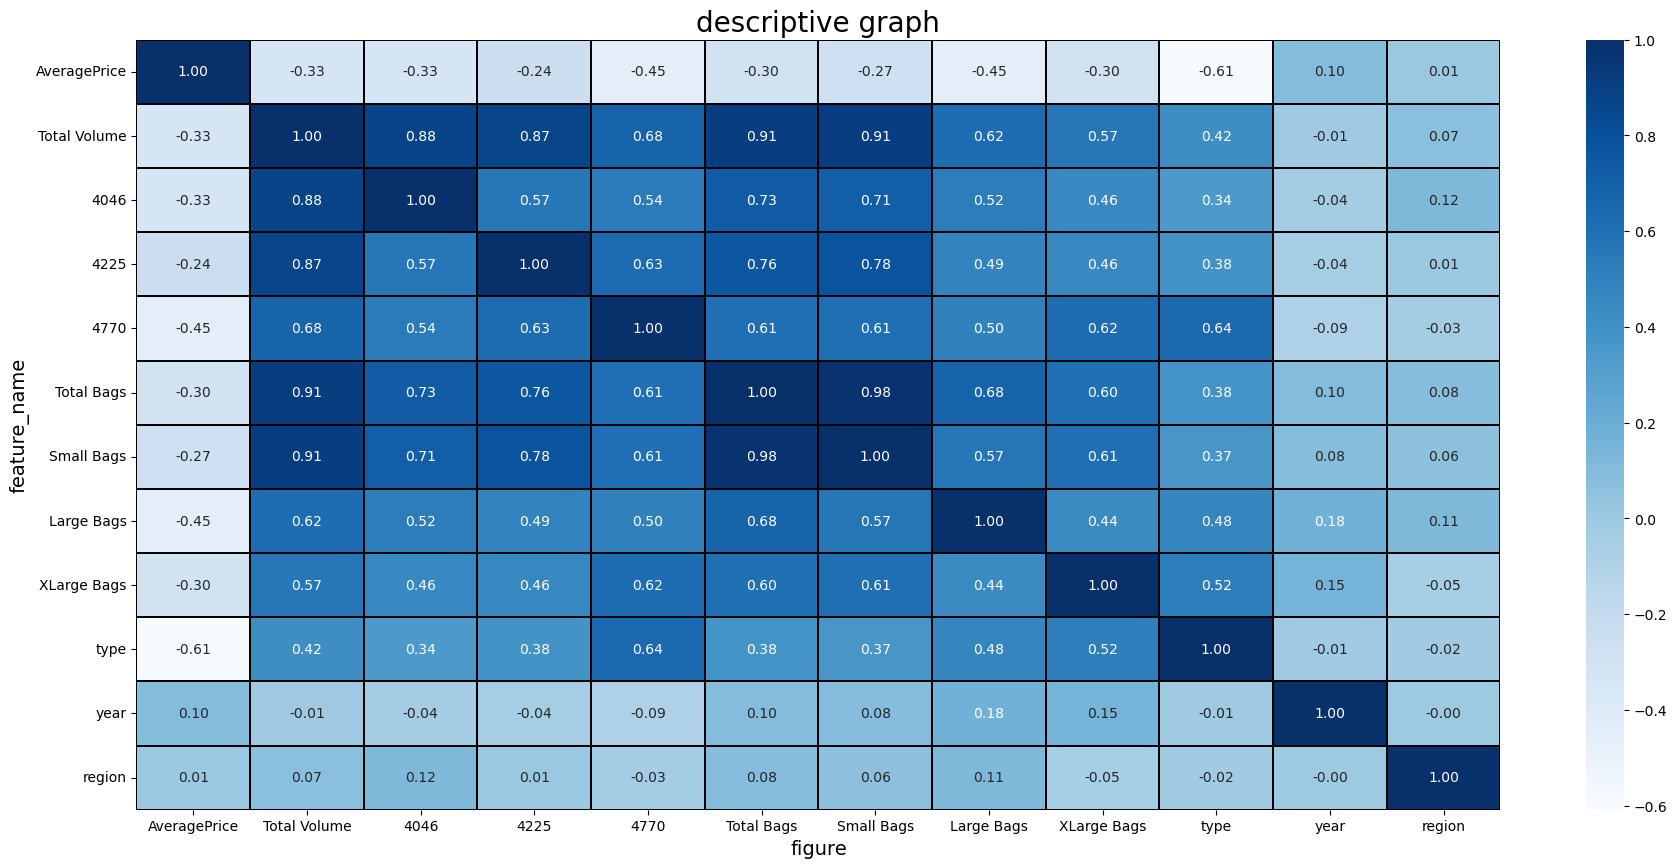

In [86]:
plt.figure(figsize=(22,10))
sns.heatmap(data1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

In [87]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17782 entries, 2015-01-27 00:12:00 to 2018-01-07 00:01:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17782 non-null  float64
 1   Total Volume  17782 non-null  float64
 2   4046          17782 non-null  float64
 3   4225          17782 non-null  float64
 4   4770          17782 non-null  float64
 5   Total Bags    17782 non-null  float64
 6   Small Bags    17782 non-null  float64
 7   Large Bags    17782 non-null  float64
 8   XLarge Bags   17782 non-null  float64
 9   type          17782 non-null  int64  
 10  year          17782 non-null  int64  
 11  region        17782 non-null  int8   
dtypes: float64(9), int64(2), int8(1)
memory usage: 1.6 MB


In [88]:
x=data1.drop(columns=['AveragePrice'],axis=1)
y=data1['AveragePrice']

In [89]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.389897,-0.348020,-0.276405,-0.529798,-0.427332,-0.399005,-0.793364,-0.516326,1.026443,-1.214908,-1.698613
1,-0.399166,-0.348847,-0.301078,-0.511952,-0.424457,-0.395490,-0.789373,-0.516326,1.026443,-1.214908,-1.698613
2,-0.336431,-0.348572,-0.138931,-0.423134,-0.429293,-0.401459,-0.784231,-0.516326,1.026443,-1.214908,-1.698613
3,-0.375283,-0.347803,-0.232365,-0.490150,-0.437592,-0.411794,-0.759214,-0.516326,1.026443,-1.214908,-1.698613
4,-0.402967,-0.348237,-0.303089,-0.485656,-0.436266,-0.410444,-0.717298,-0.516326,1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.436606,-0.345714,-0.409433,-0.800418,-0.410260,-0.379500,-0.615154,-0.516326,-0.974238,1.979143,1.742552
17778,-0.439762,-0.347666,-0.404651,-0.800418,-0.425313,-0.397535,-0.655506,-0.516326,-0.974238,1.979143,1.742552
17779,-0.439882,-0.347666,-0.407111,-0.131310,-0.424853,-0.395736,-0.855252,-0.516326,-0.974238,1.979143,1.742552
17780,-0.437467,-0.346900,-0.405784,-0.131595,-0.419252,-0.388884,-0.843497,-0.516326,-0.974238,1.979143,1.742552


In [90]:
x.shape

(17782, 11)

In [91]:
y.shape

(17782,)

In [92]:
data1.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region             int8
dtype: object

In [93]:
#finding the best random state
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("max r2_score is",maxAccu,"on random state",maxRS)

max r2_score is 0.4661208567726619 on random state 99


In [94]:
print(y.shape,y_train.shape,y_test.shape)

(17782,) (12447,) (5335,)


In [95]:
print(x.shape,x_train.shape,x_test.shape)

(17782, 11) (12447, 11) (5335, 11)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [97]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('mean squared error:',mean_squared_error(y_test,pred_LR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.4478294016074572
R2_score on training data: 44.898428258356816
mean absolute error: 0.22915182959683414
mean squared error: 0.08870401153042289
root mean squared error: 0.29783218686102897


In [98]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('mean squared error:',mean_squared_error(y_test,pred_RFR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.8397858656254537
R2_score on training data: 97.69319184329116
mean absolute error: 0.1121289222118088
mean squared error: 0.025737763771321462
root mean squared error: 0.16042993414983833


In [99]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('mean squared error:',mean_squared_error(y_test,pred_knn))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.7716331254055762
R2_score on training data: 86.05233882409706
mean absolute error: 0.13094657919400185
mean squared error: 0.0366862305529522
root mean squared error: 0.19153649927090188


In [100]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('mean squared error:',mean_squared_error(y_test,pred_GBR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.6793552943379209
R2_score on training data: 69.68621084746422
mean absolute error: 0.1708952918321944
mean squared error: 0.05151029727228998
root mean squared error: 0.22695880082581063


In [101]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('mean squared error:',mean_squared_error(y_test,pred_lasso))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

Lasso()
R2_score: -0.00018663966808962762
R2_score on training data: 0.0
mean absolute error: 0.3211103754709095
mean squared error: 0.16067600751646852
root mean squared error: 0.40084411872505815


In [102]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
R2_score: 0.44777231397279627
R2_score on training data: 44.89807876905846
mean absolute error: 0.22916404406848348
mean squared error: 0.08871318243198473
root mean squared error: 0.2978475825518561


In [103]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.6738419834206213
R2_score on training data: 100.0
mean absolute error: 0.15177507029053422
mean squared error: 0.052395988753514526
root mean squared error: 0.2289017010716926


In [104]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_score:",r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('mean squared error:',mean_squared_error(y_test,pred_svr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score: 0.6199120011460468
R2_score on training data: 62.07481892982993
mean absolute error: 0.1776518514112412
mean squared error: 0.06105962601244462
root mean squared error: 0.24710246055522114


In [105]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_score:",r2_score(y_test,pred_etr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('mean squared error:',mean_squared_error(y_test,pred_etr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.8641362344051143
R2_score on training data: 100.0
mean absolute error: 0.10044209934395504
mean squared error: 0.021825973829428313
root mean squared error: 0.14773616290342834


In [106]:
ETR IS OUR BEST MODEL

SyntaxError: invalid syntax (118810582.py, line 1)

In [ ]:
import pickle
filename='AVACADOPRICE.pk1'
pickle.dump(etr,open(filename,'wb'))    #saved model

In [ ]:
import pickle
loaded_model=pickle.load(open('AVACADOPRICE.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

In [ ]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

In [ ]:
#QUESTION2 SECOND PART

In [ ]:
data1

In [ ]:
c=data1.copy()
c

In [ ]:
x1=c.drop(columns=['region'],axis=1)
y1=c['region']

In [ ]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

In [114]:
#finding the best random state
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("max r2_score is",maxAccu,"on random state",maxRS)

max r2_score is 0.4661208567726619 on random state 99


In [115]:
print(y.shape,y_train.shape,y_test.shape)

(17782,) (12447,) (5335,)


In [116]:
print(x.shape,x_train.shape,x_test.shape)

(17782, 11) (12447, 11) (5335, 11)


In [117]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('mean squared error:',mean_squared_error(y_test,pred_LR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.4478294016074572
R2_score on training data: 44.898428258356816
mean absolute error: 0.22915182959683414
mean squared error: 0.08870401153042289
root mean squared error: 0.29783218686102897


In [118]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('mean squared error:',mean_squared_error(y_test,pred_RFR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.8386020671487014
R2_score on training data: 97.70556567085465
mean absolute error: 0.11246191190253048
mean squared error: 0.025927936290534213
root mean squared error: 0.16102153983406758


In [119]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('mean squared error:',mean_squared_error(y_test,pred_knn))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.7716331254055762
R2_score on training data: 86.05233882409706
mean absolute error: 0.13094657919400185
mean squared error: 0.0366862305529522
root mean squared error: 0.19153649927090188


In [120]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('mean squared error:',mean_squared_error(y_test,pred_GBR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.6793552943379209
R2_score on training data: 69.68621084746422
mean absolute error: 0.17089529183219443
mean squared error: 0.05151029727228998
root mean squared error: 0.22695880082581063


In [121]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('mean squared error:',mean_squared_error(y_test,pred_lasso))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

Lasso()
R2_score: -0.00018663966808962762
R2_score on training data: 0.0
mean absolute error: 0.3211103754709095
mean squared error: 0.16067600751646852
root mean squared error: 0.40084411872505815


In [122]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
R2_score: 0.44777231397279627
R2_score on training data: 44.89807876905846
mean absolute error: 0.22916404406848348
mean squared error: 0.08871318243198473
root mean squared error: 0.2978475825518561


In [123]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.6661693545915593
R2_score on training data: 100.0
mean absolute error: 0.1525323336457357
mean squared error: 0.053628566073102145
root mean squared error: 0.2315784231596332


In [124]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_score:",r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('mean squared error:',mean_squared_error(y_test,pred_svr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score: 0.6199120011460468
R2_score on training data: 62.07481892982993
mean absolute error: 0.1776518514112412
mean squared error: 0.06105962601244462
root mean squared error: 0.24710246055522114


In [125]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_score:",r2_score(y_test,pred_etr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('mean squared error:',mean_squared_error(y_test,pred_etr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.8631275098044981
R2_score on training data: 100.0
mean absolute error: 0.10065816307403938
mean squared error: 0.021988021426429246
root mean squared error: 0.14828358448064724


In [126]:
#ETR WORKING AS BEST MODEL

In [127]:
import pickle
filename='AVACADOREGION.pk1'
pickle.dump(etr,open(filename,'wb'))    #saved model

In [128]:
import pickle
loaded_model=pickle.load(open('AVACADOREGION.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.31275098044982


In [129]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
predicted,1.1875,1.594,1.6262,1.3629,1.385,2.1618,1.0949,1.0023,1.1082,1.0201,...,1.3752,0.9658,1.123,1.057,1.4809,1.5527,0.8173,1.7916,1.5802,1.7962
original,1.2200,1.640,1.8000,1.3400,1.360,2.3900,1.2400,0.7800,1.0900,0.9400,...,1.5200,0.9300,1.190,1.200,1.5000,1.4100,0.8900,1.8100,1.5500,1.9700


In [130]:
#QUESTION 3

In [733]:
df1=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition 2.csv")
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
